In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [7]:
df = spark.read.json('data100000.json')

In [8]:
df.show()
df.count()

+--------------------+--------+-----------+--------------+-------------+----------------+--------------------+-----------+--------------------+--------------------+---------+--------+
|                 _id|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|               track|travel_time|     unplug_hourTime|       user_day_code|user_type|zip_code|
+--------------------+--------+-----------+--------------+-------------+----------------+--------------------+-----------+--------------------+--------------------+---------+--------+
|[5ff24c931b913134...|       0|          3|             8|           15|             108|                null|        398|2020-12-30T15:00:00Z|243a0165719d0ba39...|        1|        |
|[5eebe4a41b913135...|       4|         22|           147|           24|             138|                null|        306|2020-01-16T18:00:00Z|930684efa2bc1e000...|        1|   28005|
|[5eec9c7e61804667...|       0|         11|            55|           14|        

100000

In [9]:
df = df.drop('_id','idplug_base','idunplug_base','track')
df.show()
# to fit df in page and see more clearly the results

+--------+--------------+----------------+-----------+--------------------+--------------------+---------+--------+
|ageRange|idplug_station|idunplug_station|travel_time|     unplug_hourTime|       user_day_code|user_type|zip_code|
+--------+--------------+----------------+-----------+--------------------+--------------------+---------+--------+
|       0|             8|             108|        398|2020-12-30T15:00:00Z|243a0165719d0ba39...|        1|        |
|       4|           147|             138|        306|2020-01-16T18:00:00Z|930684efa2bc1e000...|        1|   28005|
|       0|            55|             177|       1285|2020-06-07T19:00:00Z|98c612931b2b1aaa4...|        1|        |
|       0|           149|              37|       1038|2020-08-30T14:00:00Z|c4fc91c7b4c2f0083...|        1|        |
|       0|            95|             149|        777|{"$date":"2018-09...|017be7543ec9e86a4...|        1|        |
|       4|             4|             130|        447|2020-09-28T17:00:0

In [10]:
#1 Contar cada tipo
df.groupBy('ageRange').count().show()

+--------+-----+
|ageRange|count|
+--------+-----+
|       0|45242|
|       6|  471|
|       5|19523|
|       1| 1019|
|       3| 5280|
|       2|  788|
|       4|27677|
+--------+-----+



In [11]:
#1 Contar cada tipo
df.groupBy('idplug_station').count().show()

+--------------+-----+
|idplug_station|count|
+--------------+-----+
|            26|  701|
|            29|  164|
|            65|  553|
|           191|   87|
|           270|    1|
|           222|    8|
|           243|    1|
|            19|  831|
|            54|  477|
|           155|  502|
|           113|  555|
|           167|  462|
|           112|  318|
|           241|    5|
|           237|    1|
|           198|  195|
|           130|  515|
|           196|  220|
|             7|  511|
|            77|  575|
+--------------+-----+
only showing top 20 rows



In [12]:
#2 Filtro
df1 = df.filter(df["user_type"]==1)
df1.show()
df1.count()

+--------+--------------+----------------+-----------+--------------------+--------------------+---------+--------+
|ageRange|idplug_station|idunplug_station|travel_time|     unplug_hourTime|       user_day_code|user_type|zip_code|
+--------+--------------+----------------+-----------+--------------------+--------------------+---------+--------+
|       0|             8|             108|        398|2020-12-30T15:00:00Z|243a0165719d0ba39...|        1|        |
|       4|           147|             138|        306|2020-01-16T18:00:00Z|930684efa2bc1e000...|        1|   28005|
|       0|            55|             177|       1285|2020-06-07T19:00:00Z|98c612931b2b1aaa4...|        1|        |
|       0|           149|              37|       1038|2020-08-30T14:00:00Z|c4fc91c7b4c2f0083...|        1|        |
|       0|            95|             149|        777|{"$date":"2018-09...|017be7543ec9e86a4...|        1|        |
|       4|             4|             130|        447|2020-09-28T17:00:0

92213

In [13]:
#3
df_trips = df1.groupBy('user_day_code').count()
df_trips.show()

+--------------------+-----+
|       user_day_code|count|
+--------------------+-----+
|ea339b5f3de1d6c50...|    1|
|f484a0137582ed435...|    1|
|bb6a617c5d9f0c211...|    1|
|d247c100234fddcdc...|    1|
|3fd8a5993316cc483...|    1|
|860d843730aa2507b...|    1|
|49a6d7d13c5000068...|    1|
|c24a7a88a8420d1ee...|    1|
|dc75cab167092804a...|    1|
|8bb72da3bbb36b91e...|    1|
|a2d85d6bf5afbb7db...|    1|
|901b0bd8d3447972d...|    2|
|8e1e0034329ce714d...|    1|
|a90aac62b9518cf2c...|    1|
|795d3fb1f6e3204b4...|    1|
|de543ed673e8a2cc8...|    1|
|0c8df0f4fae03a156...|    1|
|c82d8bcc7c480fb21...|    1|
|8dd11cfaae0c3411b...|    1|
|7c5a8a0560ba7accc...|    1|
+--------------------+-----+
only showing top 20 rows



In [14]:
df_trips.filter(df_trips['count']==1).show()

+--------------------+-----+
|       user_day_code|count|
+--------------------+-----+
|ea339b5f3de1d6c50...|    1|
|f484a0137582ed435...|    1|
|bb6a617c5d9f0c211...|    1|
|d247c100234fddcdc...|    1|
|3fd8a5993316cc483...|    1|
|860d843730aa2507b...|    1|
|49a6d7d13c5000068...|    1|
|c24a7a88a8420d1ee...|    1|
|dc75cab167092804a...|    1|
|8bb72da3bbb36b91e...|    1|
|a2d85d6bf5afbb7db...|    1|
|8e1e0034329ce714d...|    1|
|a90aac62b9518cf2c...|    1|
|795d3fb1f6e3204b4...|    1|
|de543ed673e8a2cc8...|    1|
|0c8df0f4fae03a156...|    1|
|c82d8bcc7c480fb21...|    1|
|8dd11cfaae0c3411b...|    1|
|7c5a8a0560ba7accc...|    1|
|2e56e923544304b2e...|    1|
+--------------------+-----+
only showing top 20 rows



In [15]:
#lo mismo en una línea
from pyspark.sql.functions import col
df1.groupBy('user_day_code').count().alias('trips').filter(col('trips.count')==1).show()

+--------------------+-----+
|       user_day_code|count|
+--------------------+-----+
|ea339b5f3de1d6c50...|    1|
|f484a0137582ed435...|    1|
|bb6a617c5d9f0c211...|    1|
|d247c100234fddcdc...|    1|
|3fd8a5993316cc483...|    1|
|860d843730aa2507b...|    1|
|49a6d7d13c5000068...|    1|
|c24a7a88a8420d1ee...|    1|
|dc75cab167092804a...|    1|
|8bb72da3bbb36b91e...|    1|
|a2d85d6bf5afbb7db...|    1|
|8e1e0034329ce714d...|    1|
|a90aac62b9518cf2c...|    1|
|795d3fb1f6e3204b4...|    1|
|de543ed673e8a2cc8...|    1|
|0c8df0f4fae03a156...|    1|
|c82d8bcc7c480fb21...|    1|
|8dd11cfaae0c3411b...|    1|
|7c5a8a0560ba7accc...|    1|
|2e56e923544304b2e...|    1|
+--------------------+-----+
only showing top 20 rows



In [16]:
#4. Histograma de viajes
df1.groupBy('user_day_code').count().groupBy('count').count().show()

+-----+-----+
|count|count|
+-----+-----+
|    1|90762|
|    3|    7|
|    2|  715|
+-----+-----+



In [17]:
df1.groupBy('user_day_code').count().withColumnRenamed('count','trip_number').\
    groupBy('trip_number').count().show()

+-----------+-----+
|trip_number|count|
+-----------+-----+
|          1|90762|
|          3|    7|
|          2|  715|
+-----------+-----+



In [18]:
#5. Return trip. 

#En las celdas anteriores, vemos que al agrupar perdemos la información.  
#se echa de menos el poder trabajar con los datos agregados.


In [19]:
from pyspark.sql.functions import collect_list, struct
dfg = df.groupBy('user_day_code').agg(collect_list(struct('idunplug_station','idplug_station')))
dfg.show()

+--------------------+------------------------------------------------------+
|       user_day_code|collect_list(struct(idunplug_station, idplug_station))|
+--------------------+------------------------------------------------------+
|00226b65fe04bc857...|                                          [[170, 155]]|
|00b3beecedf8fec46...|                                          [[157, 160]]|
|0202a4cfc634f4d54...|                                           [[28, 101]]|
|022a11591f3a621c6...|                                  [[83, 83], [166, ...|
|024e84165f2bded3e...|                                           [[45, 187]]|
|025c39b91ab427c5c...|                                           [[77, 218]]|
|0311cb0b884618ab2...|                                             [[90, 1]]|
|049339dd7d59a2e00...|                                            [[33, 53]]|
|050eb9ed07c808ff8...|                                           [[63, 117]]|
|05abce6b89af451ac...|                                          

In [20]:
dfg = df.groupBy('user_day_code').\
    agg(collect_list(struct('idunplug_station','idplug_station')).alias('result'))
dfg.show()

+--------------------+--------------------+
|       user_day_code|              result|
+--------------------+--------------------+
|00226b65fe04bc857...|        [[170, 155]]|
|00b3beecedf8fec46...|        [[157, 160]]|
|0202a4cfc634f4d54...|         [[28, 101]]|
|022a11591f3a621c6...|[[83, 83], [166, ...|
|024e84165f2bded3e...|         [[45, 187]]|
|025c39b91ab427c5c...|         [[77, 218]]|
|0311cb0b884618ab2...|           [[90, 1]]|
|049339dd7d59a2e00...|          [[33, 53]]|
|050eb9ed07c808ff8...|         [[63, 117]]|
|05abce6b89af451ac...|         [[189, 76]]|
|05ae48f91163eab0c...|         [[58, 149]]|
|066cd7e0023944735...|        [[175, 174]]|
|06d50fc431dd96585...|          [[56, 16]]|
|06f298d02d11beb86...|          [[57, 41]]|
|0979cc9e31051f04e...|        [[179, 188]]|
|0a3636297f84a0ba4...|          [[55, 41]]|
|0a66b6a57c9c3249e...|          [[26, 27]]|
|0a7ba80610a81bc98...|         [[108, 64]]|
|0b84c29d6cf269a6c...|          [[42, 43]]|
|0c0c7723bfb33af9f...|          

In [21]:
#aplicar la función de abajo...para calcular la longitud... ver si podemos hacer más cosas, como ver 
# que es un round trip

In [22]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

trips_len = udf(lambda x: len(x), IntegerType())
dfg.select(trips_len('user_day_code')).show()

+-----------------------+
|<lambda>(user_day_code)|
+-----------------------+
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
|                     64|
+-----------------------+
only showing top 20 rows



In [23]:
dfg2 = dfg.withColumn('len_udc', trips_len(dfg['user_day_code']))
dfg2.show()

+--------------------+--------------------+-------+
|       user_day_code|              result|len_udc|
+--------------------+--------------------+-------+
|00226b65fe04bc857...|        [[170, 155]]|     64|
|00b3beecedf8fec46...|        [[157, 160]]|     64|
|0202a4cfc634f4d54...|         [[28, 101]]|     64|
|022a11591f3a621c6...|[[83, 83], [166, ...|     64|
|024e84165f2bded3e...|         [[45, 187]]|     64|
|025c39b91ab427c5c...|         [[77, 218]]|     64|
|0311cb0b884618ab2...|           [[90, 1]]|     64|
|049339dd7d59a2e00...|          [[33, 53]]|     64|
|050eb9ed07c808ff8...|         [[63, 117]]|     64|
|05abce6b89af451ac...|         [[189, 76]]|     64|
|05ae48f91163eab0c...|         [[58, 149]]|     64|
|066cd7e0023944735...|        [[175, 174]]|     64|
|06d50fc431dd96585...|          [[56, 16]]|     64|
|06f298d02d11beb86...|          [[57, 41]]|     64|
|0979cc9e31051f04e...|        [[179, 188]]|     64|
|0a3636297f84a0ba4...|          [[55, 41]]|     64|
|0a66b6a57c9

In [24]:
from pyspark.sql.types import BooleanType

def round_trip(x):
    if len(x) != 2:
        return False
    else:
        return x[0][1] == x[1][0] and x[0][0] == x[1][1]

round_trip_udf = udf(lambda x: round_trip(x), BooleanType())

dfg.withColumn('round_trip', round_trip_udf(dfg['result'])).alias('dfgrt').filter(col('dfgrt.round_trip')).show()


+--------------------+--------------------+----------+
|       user_day_code|              result|round_trip|
+--------------------+--------------------+----------+
|6d2aa153f3950589d...|[[161, 137], [137...|      true|
|72246ac8d990a2d2a...|[[137, 137], [137...|      true|
|433a28116c1dd7339...|[[199, 125], [125...|      true|
|cf1edc8d29e588555...|[[131, 131], [131...|      true|
|72b91b32b5d748f9e...|[[83, 108], [108,...|      true|
|9ea023b3c71e1a940...|  [[45, 7], [7, 45]]|      true|
|e083939f9c727ecac...|[[11, 75], [75, 11]]|      true|
|68102ff64e76415ce...|[[135, 135], [135...|      true|
|f7f43bc051ebe3036...|[[128, 147], [147...|      true|
|7abe107397db5caa8...|[[69, 69], [69, 69]]|      true|
|e0c16f5d108d2a088...|[[31, 74], [74, 31]]|      true|
|eda0f29e332d0682f...|[[83, 39], [39, 83]]|      true|
|38a1a74229419b05f...|[[199, 8], [8, 199]]|      true|
|bf46b8a63361d477d...|[[83, 53], [53, 83]]|      true|
|5d3989a16c28466ca...|[[161, 161], [161...|      true|
|41009a419

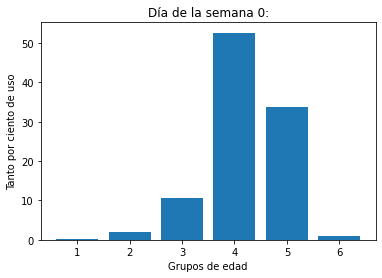

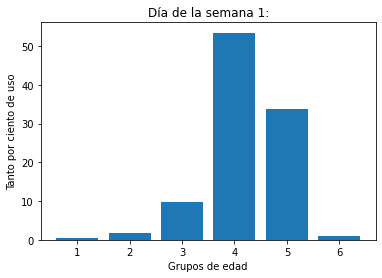

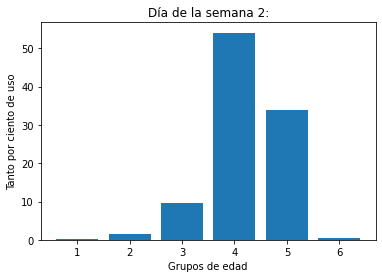

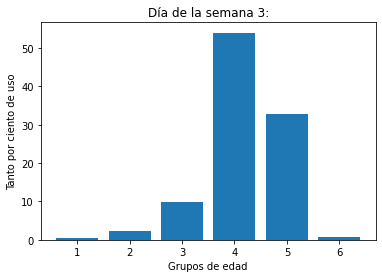

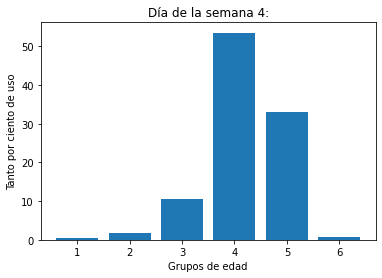

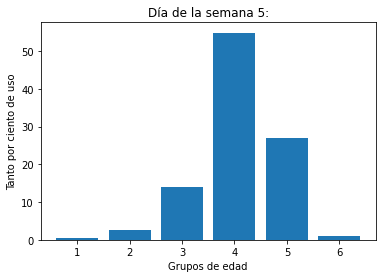

In [18]:
d18 = {1: 4935, 6: 2931, 3: 4931, 5: 3051, 4: 4454, 2: 4806, 0: 4644}
lisdicc18 = [{1: 18, 6: 15, 3: 18, 5: 16, 4: 21, 2: 8, 0: 7}, {1: 90, 6: 59, 3: 115, 5: 78, 4: 79, 2: 70, 0: 95}, {1: 480, 6: 416, 3: 482, 5: 429, 4: 470, 2: 466, 0: 493}, {1: 2638, 6: 1592, 3: 2663, 5: 1675, 4: 2383, 2: 2599, 0: 2444}, {1: 1661, 6: 818, 3: 1612, 5: 825, 4: 1469, 2: 1635, 0: 1566}, {1: 48, 6: 31, 3: 41, 5: 28, 4: 32, 2: 28, 0: 39}]

def to_porcentaje(tot, lis):
    p = []
    for i in range(len(lis)):
        t = []
        for j in range(6):
            a = 100*lis[i][j]/tot[j]
            t.append(a)
        p.append(t)
    return p


import matplotlib.pyplot as plt
def plotear(x):
    i = 0
    plt.figure()
    for i in range(6):
        edad = [1,2,3,4,5,6]
        y = []
        for j in range(len(x)):
            day = x[j][i]
            y.append(day)
        plt.subplot()
        plt.xlabel('Grupos de edad')
        plt.ylabel('Tanto por ciento de uso')
        plt.title('Día de la semana %d:' %i)
        plt.bar(edad, y)
        i += 1
        plt.show()

plotear(to_porcentaje(d18, lisdicc18))